In [1]:
from models import ToneLibrary, Tone
import matplotlib.pyplot as plt

tone_library = ToneLibrary(directory='Tones')
tone_library.populate()


/Users/p13i/Projects/hmm-tones/venv/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


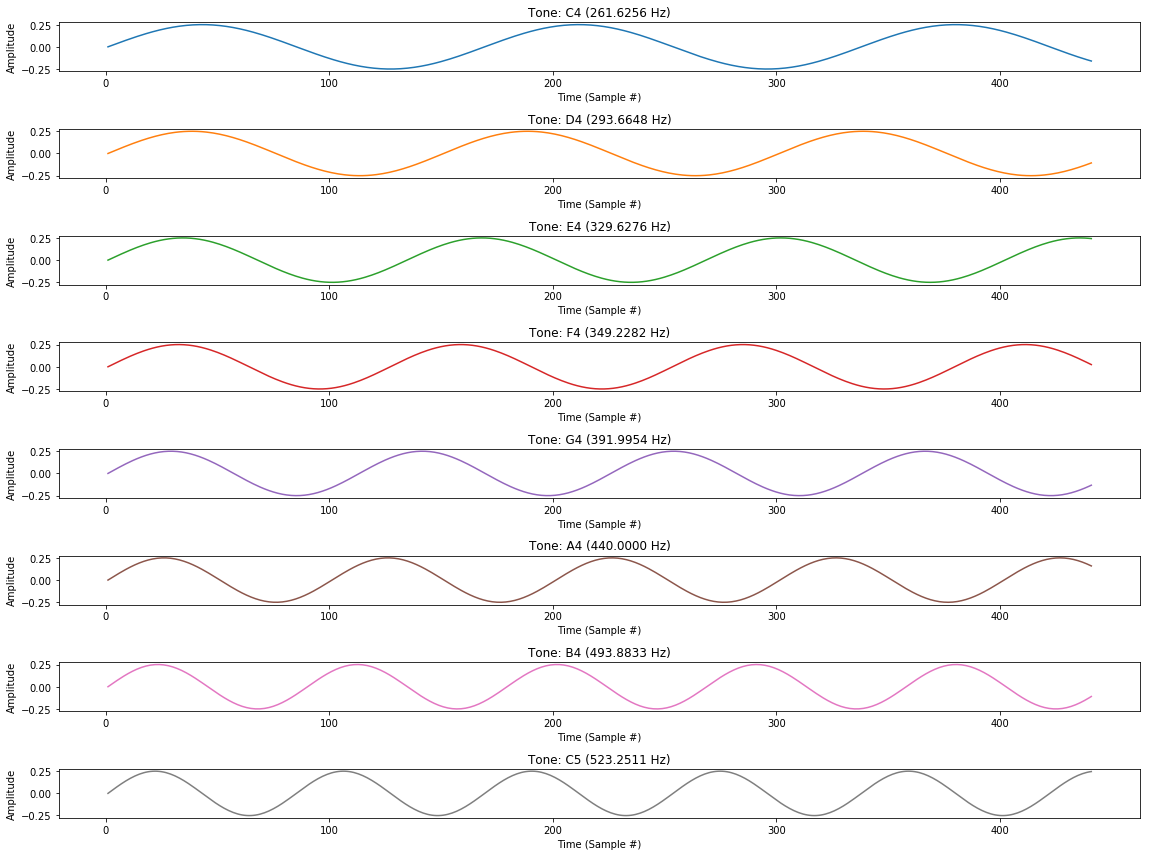

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

_, axes = plt.subplots(len(tone_library), 1, figsize=(16, 12))

# https://stackoverflow.com/a/42091037
plt_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, tone in enumerate(tone_library):
    
    plt_num_samples = int(tone.num_total_samples / 50)
    x = tone.time[:plt_num_samples]
    y = tone.get_channel(1)[:plt_num_samples]
    
    ax = axes[i]
    sns.lineplot(x, y, color=plt_colors[i], ax=ax).set_title(str(tone))
    ax.set(xlabel='Time (Sample #)', ylabel='Amplitude')

plt.tight_layout()

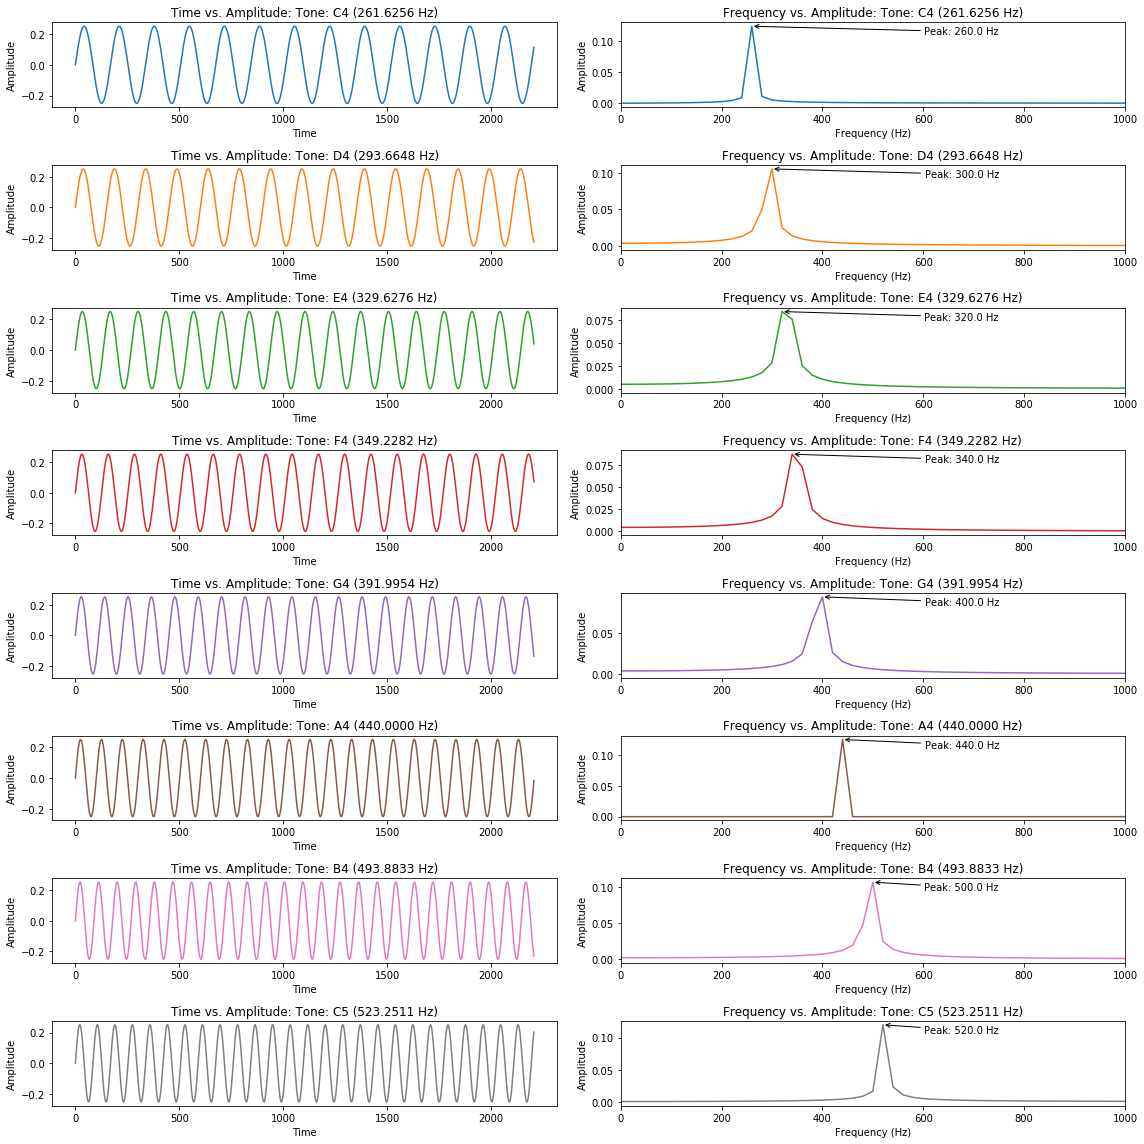

In [49]:
import numpy as np


def fft(signal, rate):
    """
    Based on https://plot.ly/matplotlib/fft/
    :param signal: 
    :param rate: 
    :return: 
    """
    n = len(signal)
    
    k = np.arange(n)
    T = n / rate
    freq = k / T  # two-sided frequency range
    freq = freq[range(int(n / 2))]  # one-sided frequency range
    
    # FFT + Normalization
    y = np.fft.fft(signal) / n
    y = y[range(int(n / 2))]
    y = abs(y)
    
    return freq, y


tones = list(tone_library)
_, axes = plt.subplots(len(tones), 2, figsize=(16, 16))

for i, tone in enumerate(tones):
        
    plt_num_samples = tone.num_total_samples // 10
    time = tone.time[:plt_num_samples]
    signal = tone.get_channel(1)[:plt_num_samples]
    rate = tone.rate
    
    fft_freq, fft_y = fft(signal, rate)
    
    max_fft_y_index = np.argmax(fft_y)
    max_fft_y_value = np.max(fft_y)
    estimated_peak_freq = fft_freq[max_fft_y_index]

    plt_color = plt_colors[i]
    
    ax = axes[i, 0]
    sns.lineplot(time, signal, linestyle='-', color=plt_color, ax=ax).set_title('Time vs. Amplitude: %s' % tone)
    ax.set(xlabel='Time', ylabel='Amplitude')
    
    ax = axes[i, 1]
    sns.lineplot(fft_freq, fft_y, linestyle='-', color=plt_color, ax=ax).set_title('Frequency vs. Amplitude: %s' % tone)
    ax.set(xlabel='Frequency (Hz)', ylabel='Amplitude', xlim=(0, 1000))
    # https://matplotlib.org/gallery/text_labels_and_annotations/annotation_demo.html
    ax.annotate('Peak: %s Hz' % estimated_peak_freq,
                xy=(estimated_peak_freq, max_fft_y_value), xycoords='data',
                xytext=(0.75, 0.95), textcoords='axes fraction',
                arrowprops=dict(arrowstyle='->'),
                horizontalalignment='right', verticalalignment='top')
    
plt.tight_layout()